# Read ASCII File
This jupyter notebook demonstrates usage of the `GoesAsciiFile` class to read and plot data from legacy ascii files.

First, import some libraries.

In [1]:
import goeset
import matplotlib.pyplot as plt

Next, create the `GoesAsciiFile` object and print out it's help documents to see what it does and some example usage.

In [2]:
etf = goeset.GoesAsciiFile(r'data\sample_data.txt')
help(etf)

Help on GoesAsciiFile in module goeset.utils object:

class GoesAsciiFile(builtins.object)
 |  GoesAsciiFile(fpth)
 |  
 |  A thin wrapper around the Pandas DataFrame class to help read
 |  and manipulate legacy ASCII files.
 |  
 |  Attributes
 |  ----------
 |  
 |  Methods
 |  -------
 |  
 |  Examples
 |  --------
 |  >>> import goeset
 |  >>> etfile = goeset.GoesAsciiFile('Florida_2017.txt')
 |  >>> eto = etfile.get_array('RET')
 |  
 |  >>> import goeset
 |  >>> etfile  = goeset.GoesAsciiFile('Florida_2017.txt')
 |  >>> df = etfile.get_dataframe(nrows=500)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fpth)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_array(self, param, flush=False)
 |      Get data stored in the ASCII file as a numpy.maskedarray.
 |      
 |      Parameters
 |      ----------
 |      param : str
 |          Name of the parameter for which data will be returned
 |      flush : bool
 |          If true, reload fresh 

## Get Pandas.DataFrame
Use the `get_dataframe()` method to read the ascii file and return a `Pandas.DataFrame` object.

In [3]:
df = etf.get_dataframe()
df

YYYYMMDD     Lat     Lon   NRpix    PET    ETo  Solar  \
date       NRpix                                                           
2019-01-01 8390    20190101  24.554 -82.113    8390  3.727  3.348  15.43   
           8406    20190101  24.554 -81.807    8406  3.818  3.031  16.31   
           8407    20190101  24.554 -81.788    8407  3.801  3.077  16.06   
           8865    20190101  24.572 -82.094    8865  3.794  3.556  16.37   
           8883    20190101  24.572 -81.749    8883  3.821  3.315  16.29   
...                     ...     ...     ...     ...    ...    ...    ...   
2019-01-10 177926  20190110  30.985 -85.096  177926  1.368  1.260  15.11   
           177927  20190110  30.985 -85.076  177927  1.346  1.233  14.86   
           177928  20190110  30.985 -85.057  177928  1.338  1.307  14.85   
           177929  20190110  30.985 -85.038  177929  1.328  1.322  14.77   
           177930  20190110  30.985 -85.019  177930  1.320  1.431  14.88   

                   Albedo   RHmax   RHmin    Tmax    Tmin   ws2m       date  
date       NRpix                                                             
2019-01-01 8390     0.048  20.076  27.221  55.519  97.906  5.813 2019-01-01  
           8406     0.136  20.087  27.639  55.490  98.441  5.718 2019-01-01  
           8407     0.121  20.085  27.662  55.505  98.455  5.716 2019-01-01  
           8865     0.047  20.051  27.245  55.405  97.972  5.774 2019-01-01  
           8883     0.089  20.052  27.716  55.434  98.504  5.683 2019-01-01  
...                   ...     ...     ...     ...     ...    ...        ...  
2019-01-10 177926   0.087  -0.917  10.292  49.247  87.628  2.939 2019-01-10  
           177927   0.089  -0.893  10.222  49.818  87.120  2.964 2019-01-10  
           177928   0.068  -0.872  10.153  50.414  86.672  2.987 2019-01-10  
           177929   0.062  -0.853  10.086  51.029  86.288  3.008 2019-01-10  
           177930   0.034  -0.836  10.022  51.648  85.971  3.027 2019-01-10  

[391750 rows x 14 columns]

## Plot Data
Example of how to plot data stored in the file. First, plot a timeseries of data for Pixel ID 8390:

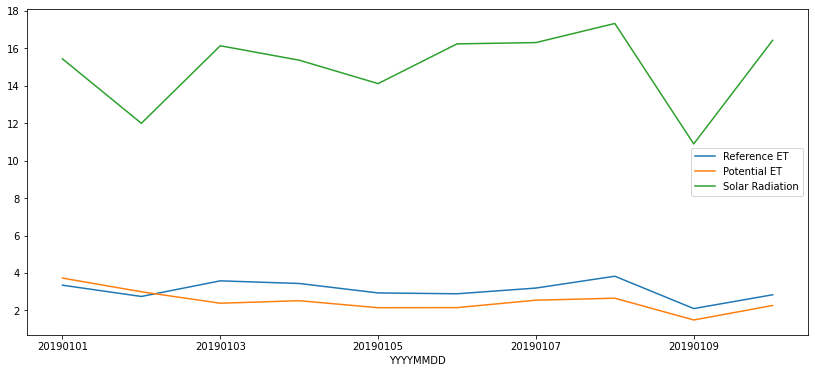

In [4]:
# Get data for pixel 8390
pixel_id = 8390
pxdata = df.set_index(['NRpix'])
pxdata = pxdata.loc[pixel_id]

# Set the DataFrame index on the date column
# so we can get nice timestamps on the x-axis of our plot
pxdata = pxdata.set_index(['YYYYMMDD'])

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)

pxdata['ETo'].plot(ax=ax, label='Reference ET')
pxdata['PET'].plot(ax=ax, label='Potential ET')
pxdata['Solar'].plot(ax=ax, label='Solar Radiation')

plt.legend()
plt.show()

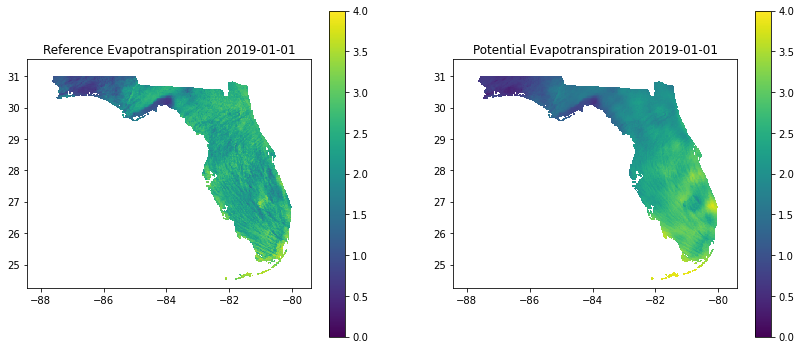

In [5]:
fig = plt.figure(figsize=(14, 6))

iday = 0


# Reference ET
ax = fig.add_subplot(121, aspect='equal')
dt = etf.dates[iday]
dtstr = dt.strftime('%Y-%m-%d')
ax.set_title(f'Reference Evapotranspiration {dtstr}')

# Get the latitude/longitude values
x, y = etf.longitude.reshape(etf.nrow, etf.ncol), etf.latitude.reshape(etf.nrow, etf.ncol)

# Get the data values
array = etf.get_array('ETo')

# Plot it
quadmesh = ax.pcolormesh(x, y, array[iday], vmin=0, vmax=4)
cb = plt.colorbar(quadmesh)


# Potential ET
ax = fig.add_subplot(122, aspect='equal')
dt = etf.dates[iday]
dtstr = dt.strftime('%Y-%m-%d')
ax.set_title(f'Potential Evapotranspiration {dtstr}')

# Get the latitude/longitude values
x, y = etf.longitude.reshape(etf.nrow, etf.ncol), etf.latitude.reshape(etf.nrow, etf.ncol)

# Get the data values
array = etf.get_array('PET')

# Plot it
quadmesh = ax.pcolormesh(x, y, array[iday], vmin=0, vmax=4)
cb = plt.colorbar(quadmesh)


plt.show()